In [1]:
%pip install missingno
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


# Importing the Packages


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Collection

In [3]:
data_train = pd.read_csv('loan-train.csv')
data_test = pd.read_csv('loan-test.csv')

In [4]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
data_train_columns = data_train.columns
data_train_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
def count_of_feature(frame, feature):
    
    if frame[feature].dtype != 'int64' and frame[feature].dtype != 'float64' and feature != 'Loan_ID':
        print(frame[feature].value_counts())
        
for feature in data_train_columns:
    if feature!='Loan_ID' and data_train[feature].dtype=='object':
        print(f"\nValue Counts of {feature}:")
        count_of_feature(data_train, feature)


Value Counts of Gender:
Male      489
Female    112
Name: Gender, dtype: int64

Value Counts of Married:
Yes    398
No     213
Name: Married, dtype: int64

Value Counts of Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Value Counts of Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Value Counts of Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64

Value Counts of Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Value Counts of Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64


# Handling Missing Data

In [9]:
import missingno as msno

data_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0], inplace=True) 
data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0], inplace=True) 

data_train['LoanAmount'].fillna(data_train['LoanAmount'].mean(), inplace=True) 
data_test['LoanAmount'].fillna(data_test['LoanAmount'].mean(), inplace=True) 

data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0], inplace=True)
data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].mode()[0], inplace=True)

In [14]:
data_train['Gender'] = data_train['Gender'].fillna(data_train['Gender'].dropna().mode().values[0] )
data_test['Gender'] = data_test['Gender'].fillna(data_test['Gender'].dropna().mode().values[0] )

data_train['Dependents'] = data_train['Dependents'].fillna(data_train['Dependents'].dropna().mode().values[0])
data_test['Dependents'] = data_test['Dependents'].fillna(data_test['Dependents'].dropna().mode().values[0])

data_train['Self_Employed'] = data_train['Self_Employed'].fillna(data_train['Self_Employed'].dropna().mode().values[0])
data_test['Self_Employed'] = data_test['Self_Employed'].fillna(data_test['Self_Employed'].dropna().mode().values[0])

data_train['Married'] = data_train['Married'].fillna(data_train['Married'].dropna().mode().values[0])
data_test['Married'] = data_test['Married'].fillna(data_test['Married'].dropna().mode().values[0])

In [15]:
data_train.isna().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data analysis


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
needLabelFeatures = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
for feature in needLabelFeatures:
    data_train[feature] = le.fit_transform(data_train[feature])
    data_test[feature] = le.fit_transform(data_test[feature])
    
data_train['Loan_Status'] = le.fit_transform(data_train['Loan_Status'])

<AxesSubplot:>

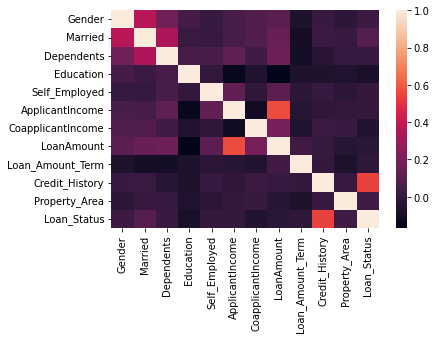

In [22]:
sns.heatmap(data_train.corr())

<AxesSubplot:>

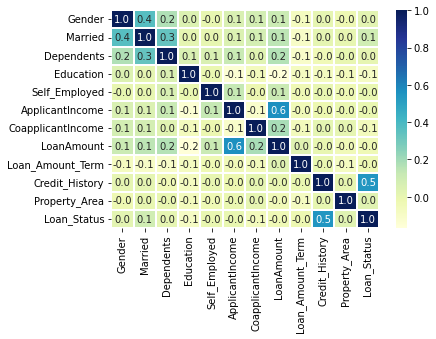

In [23]:
sns.heatmap(data_train.corr(), cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.1)

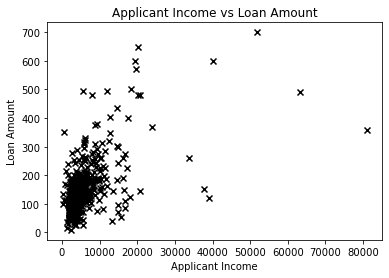

In [24]:
plt.title("Applicant Income vs Loan Amount")

plt.scatter(data_train['ApplicantIncome'] , data_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [25]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [26]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


# Training

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x = LogisticRegression()

In [28]:
data_test = data_test.drop('Loan_ID',axis=1)
data_train = data_train.drop('Loan_ID', axis=1)

In [29]:
x_train = data_train.drop('Loan_Status', axis=1).values
y_train = data_train['Loan_Status'].values

x_test = data_test.values

In [30]:
x.fit(x_train, y_train)

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predicted = x.predict(x_test)

In [33]:
print('Coefficient of model :', x.coef_)

Coefficient of model : [[ 1.10762039e-01  4.71745343e-01 -1.69013969e-01 -3.97273652e-01
   2.17008066e-03  3.15741110e-06 -6.80861890e-05 -3.03742047e-03
  -2.78471046e-03  2.41764279e+00  8.49050961e-02]]


In [35]:
score = x.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [37]:
predict_test = x.predict(x_test)
print('Target on test data',predict_test)

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [38]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [39]:
case = np.array([[1, 0, 0, 0, 0, 5849, 0.0, 146.412162, 360.0, 1.0, 2]])
predict_check = x.predict(case)
if predict_check[0] == 1:
    print("Loan_Status = Yes")
else:
    print("Loan_Status = No")

Loan_Status = Yes
